## Conditional Graph

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph , START,END

In [2]:
class AgentState(TypedDict):
    number1: int
    operator:str
    number2: int
    final:int

In [5]:
def adder(state:AgentState)->AgentState:
    """This nodes add 2 numbers"""
    state["final"]=state["number1"]+state["number2"]

    return state


def subtractor(state:AgentState)->AgentState:
    """This nodes subtract 2 numbers"""
    state["final"]=state["number1"]-state["number2"]
    return state

def decide_next_node(state:AgentState)->AgentState:
    """This node will select the next node of the graph"""

    if state["operator"]=="+":
        return "additional_operator"

    elif state["operator"]=="-":
        return "subtractor_operator"



In [7]:
graph= StateGraph(AgentState)
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router",lambda  state:state) #pasthrough function

graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge:Node
        "additional_operator":"add_node",
        "subtractor_operator":"subtract_node",
    }
)

graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

app=graph.compile()

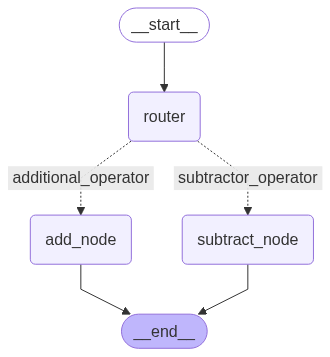

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
initial_state_1=AgentState(number1=10,operator="+",number2=5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operator': '+', 'number2': 5, 'final': 15}


Exercise

In [15]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1:str
    operation2:str
    finalNumber1:int
    finalNumber2:int

def adder1(state:AgentState)->AgentState:
    """this nodes add 2 numbers"""
    state["finalNumber1"]=state["number1"]+state["number2"]
    return state

def subtractor1(state:AgentState)->AgentState:
    state["finalNumber1"]=state["number1"]-state["number2"]
    return state

def adder2(state:AgentState)->AgentState:
    state["finalNumber2"]=state["number3"]+state["number4"]
    return state

def subtractor2(state:AgentState)->AgentState:
    state["finalNumber2"]=state["number3"]-state["number4"]
    return state

def decide_next1(state:AgentState)->AgentState:
    if state["operation1"]=="+":
        return "additional_operator1"
    elif state["operation1"]=="-":
        return "subtractor_operator1"

def decide_next2(state:AgentState)->AgentState:
    if state["operation2"]=="+":
        return "additional_operator2"
    elif state["operation2"]=="-":
        return "subtractor_operator2"



In [16]:

graph= StateGraph(AgentState)
graph.add_node("add_node",adder1)
graph.add_node("subtract_node",subtractor1)
graph.add_node("router",lambda state:state)

graph.add_node("add_node1",adder2)
graph.add_node("subtract_node1",subtractor2)
graph.add_node("router1",lambda state:state)

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next1,
    {
        "additional_operator1":"add_node",
        "subtractor_operator1":"subtract_node",
    }
)
graph.add_edge("add_node","router1")
graph.add_edge("subtract_node","router1")

graph.add_conditional_edges(
    "router1",
    decide_next2,
    {
        "additional_operator2":"add_node1",
        "subtractor_operator2":"subtract_node1",
    }
)
graph.add_edge("add_node1",END)
graph.add_edge("subtract_node1",END)
app=graph.compile()

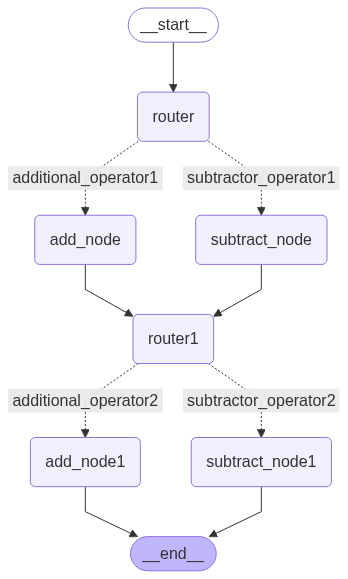

In [17]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [21]:
initial_state = AgentState(number1 = 10, operation1="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber1= 0, finalNumber2 = 0)


In [22]:
print(app.invoke(initial_state))

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'operation1': '-', 'operation2': '+', 'finalNumber1': 5, 'finalNumber2': 9}
